In [2]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import community
import matplotlib.pyplot as plt
import networkx as nx
import json

In [3]:
df = pd.read_csv('/Users/christophermarker/Documents/DSI7/Data/Capstone/export_griis.csv', sep=';', encoding='latin-1')

In [4]:
df.drop(['Unnamed: 10'], axis=1, inplace=True)

In [5]:
df.shape

(84405, 10)

In [6]:
df.head()

,Species,Authority,Country,Kingdom,Environment/System,Origin,Evidence of Impacts (Y/N),Verification (Y/N),Date,Source
0,Abax parallelepipedus,"(Piller & Mitterpacher, 1783)",Belgium,Animalia,terrestrial,Alien,No,Yes,2017,''RINSE - Reducing the Impact of Non-Native Sp...
1,Abax parallelepipedus,"(Piller & Mitterpacher, 1783)",Canada,Animalia,terrestrial,Alien,No,No,2017,Food and Agricultural Organisation of the Unit...
2,Abbottina rivularis,"(Basilewsky, 1855)",Japan,Animalia,freshwater,Alien,No,No,2017,Invasive Species of Japan (2014). Invasive Spe...
3,Abbottina rivularis,"(Basilewsky, 1855)",Kazakhstan,Animalia,freshwater,Alien,No,No,2017,"Froese, R. and D. Pauly. Editors. (2014). Fish..."
4,Abbottina rivularis,"(Basilewsky, 1855)",Kyrgyzstan,Animalia,freshwater,Alien,No,No,2017,CAB International (2014). CABI Invasive Specie...


In [7]:
df[df['Country'].str.contains('America')]

,Species,Authority,Country,Kingdom,Environment/System,Origin,Evidence of Impacts (Y/N),Verification (Y/N),Date,Source
40,Abelmoschus moschatus,Medik.,American Samoa,Plantae,terrestrial,Alien,No,Yes,2017,"Ragone, D. and D.H. Lorence. (2006). Botanical..."
141,Abrus precatorius,L.,American Samoa,Plantae,terrestrial,Alien,No,Yes,2017,"US Forest Service, Pacific Island Ecosystems a..."
268,Acacia auriculiformis,Benth.,American Samoa,Plantae,terrestrial,Alien,No,Yes,2017,"Space, J. C., Flynn, T. (2000). Observations o..."
556,Acacia mangium,Willd.,American Samoa,Plantae,terrestrial,Alien,Yes,Yes,2017,"Hanson, D. E. (2004). ASSIST: Development of t..."
830,Acalypha indica,L.,American Samoa,Plantae,terrestrial,Alien,No,Yes,2017,"US Forest Service, Pacific Island Ecosystems a..."
841,Acalypha lanceolata,Willd.,American Samoa,Plantae,terrestrial,Alien,No,Yes,2017,"US Forest Service, Pacific Island Ecosystems a..."
1357,Achyranthes aspera,L.,American Samoa,Plantae,terrestrial,Alien,No,Yes,2017,"US Forest Service, Pacific Island Ecosystems a..."
1486,Acmella uliginosa,Cass. (Sw.),American Samoa,Plantae,terrestrial,Alien,No,Yes,2017,"US Forest Service, Pacific Island Ecosystems a..."
1583,Acridotheres fuscus,"(Wagler, 1827)",American Samoa,Animalia,terrestrial,Alien,Yes,Yes,2017,"Hanson, D. E. (2004). ASSIST: Development of t..."
1627,Acridotheres tristis,"Linnaeus, 1766",American Samoa,Animalia,terrestrial,Alien,Yes,Yes,2017,"Hanson, D. E. (2004). ASSIST: Development of t..."


In [8]:
df.replace('Adelgespiceae', 'Adelges piceae', inplace=True)

In [9]:
df['Evidence of Impacts (Y/N)'].value_counts()

No     75541
Yes     8864
Name: Evidence of Impacts (Y/N), dtype: int64

In [10]:
lst_all = df.Species.unique().tolist()

In [11]:
lst_2_words = []
lst_1_word = []
lst_3_or_more = []

for i in lst_all:
    if i.count(' ') == 1:
        lst_2_words.append(i)
    if i.count(' ') == 0:
        lst_1_word.append(i)
    if i.count(' ') >= 2:
        lst_3_or_more.append(i)

In [12]:
print(len(lst_2_words))
print(len(lst_1_word))
print(len(lst_3_or_more))

19787
207
1315


# Adjacency Matrix

In [13]:
am = pd.DataFrame(np.zeros(shape=(203,203)), columns=df['Country'].unique(), index=df['Country'].unique())

In [14]:
countries = []
for country in df[df['Origin'].str.contains('Native')]['Country'].unique():
    countries.append(country)
    for species in list(df[(df['Country'] == country) & (df['Origin'] == 'Native/Alien')]['Species']):
        for invaded_country in df[(df['Species'] == species) & (df['Origin'] == 'Alien')]['Country']:
            countries.append(invaded_country)
            am.at[invaded_country,country] += 1
            
            #print('Species {} invaded {} from {}'.format(species, invaded_country, country))

In [15]:
countries = set(countries)

In [16]:
drop = [x for x in df['Country'].unique() if x not in countries]

In [17]:
am.drop(drop, inplace=True) #dropping rows

In [18]:
am.drop(drop, inplace=True, axis=1) # dropping columns

In [19]:
am.shape

(197, 197)

In [20]:
am

,Belgium,Canada,Japan,Kazakhstan,Kyrgyzstan,Lao People's Democratic Republic,Mongolia,Myanmar,Turkmenistan,Uzbekistan,...,Bahrain,Djibouti,Venezuela,Central African Republic,The former Yugoslav Republic of Macedonia,Azerbaijan,Georgia,Tajikistan,Guyana,Finland
Belgium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Canada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Japan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kazakhstan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kyrgyzstan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lao People's Democratic Republic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mongolia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Myanmar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Turkmenistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Uzbekistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
test_labels = dict({(i,am.index[i]) for i in range(am.shape[0])})

test_labels.items()

dict_items([(65, 'Malta'), (3, 'Kazakhstan'), (54, 'Mexico'), (74, 'Gabon'), (175, 'Oman'), (179, 'Belize'), (27, 'Taiwan'), (96, 'Poland'), (70, 'Burkina Faso'), (190, 'Central African Republic'), (42, 'Portugal'), (58, 'Bahamas'), (44, 'Norway'), (158, 'Somalia'), (166, 'Hungary'), (135, 'Bhutan'), (181, 'Paraguay'), (81, 'Kiribati'), (188, 'Djibouti'), (89, 'Bosnia and Herzegovina'), (69, 'Angola'), (2, 'Japan'), (79, 'Aruba'), (156, 'Jordan'), (103, 'Cambodia'), (107, 'Democratic Republic of the Congo'), (114, 'Sri Lanka'), (173, 'Slovakia'), (102, 'Burundi'), (49, 'Czech Republic'), (153, 'Afghanistan'), (125, 'Mauritius'), (160, 'Equatorial Guinea'), (161, 'Panama'), (6, 'Mongolia'), (18, 'Madagascar'), (71, 'Cabo Verde'), (176, 'Qatar'), (128, 'Mauritania'), (129, 'Niger'), (193, 'Georgia'), (113, 'Sierra Leone'), (8, 'Turkmenistan'), (165, 'Guinea'), (178, 'Saint Kitts and Nevis'), (99, 'Bangladesh'), (19, 'Marshall Islands'), (94, 'Morocco'), (40, 'Denmark'), (67, 'Israel'), (

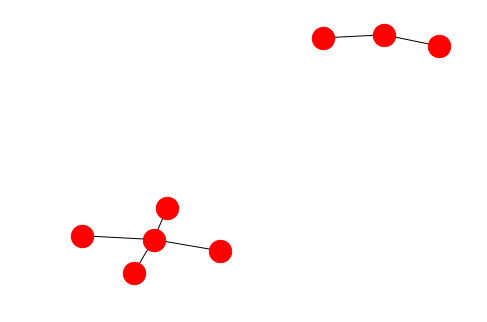

In [27]:
# From stack_overflow

def show_graph_with_labels(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix == 10)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, labels=mylabels, with_labels=False)
    plt.show()

show_graph_with_labels(am.values, test_labels)

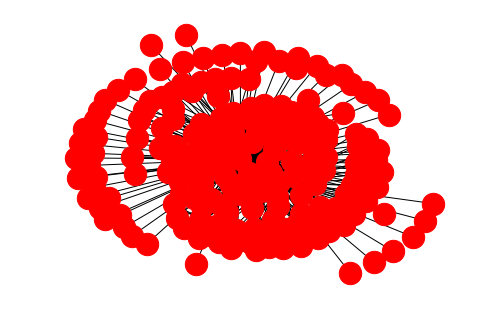

In [28]:
def show_graph_with_labels(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix > 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, labels=mylabels, with_labels=False)
    plt.show()

show_graph_with_labels(am.values, test_labels)

In [ ]:
def show_graph_with_labels(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix == 70)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, labels=mylabels, with_labels=True)
    plt.show()

show_graph_with_labels(am.values, test_labels)

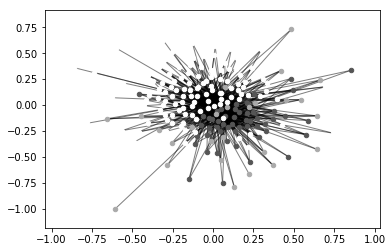

In [291]:
A=numpy.matrix(am)
G=nx.from_numpy_matrix(A)

partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=.5)
plt.show()

# Modularity Score for Community Analysis

In [364]:
modularity = community.modularity(partition, G)
print('Your modularity score is', modularity)

Your modularity score is 0.19424436706274217


In [214]:
modularity

0.19424436706274217

# Further Community Analysis

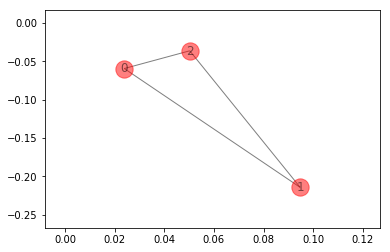

In [295]:
IG = community.induced_graph(partition, G, weight='weight')

nx.draw_networkx(IG, pos, alpha=.5)
plt.show()

In [313]:
 cd = community.generate_dendrogram(G)

In [ ]:
am.index.values

In [ ]:
list(cd[0].values())

In [335]:
partition_df = pd.DataFrame({'partition':list(cd[0].values()), 'country':am.index.values}, index=cd[0].keys())

In [336]:
partition_df.to_csv('/Users/christophermarker/Documents/DSI7/Data/Capstone/partition.csv')

# Scraping COL

In [121]:
dist = []
for i in lst_2_words:
    w1,w2 = i.split(' ')
    response = requests.get('http://webservice.catalogueoflife.org/col/webservice?name=' + w1 + '+' + w2 + '&format=json&response=full')
    try:
        if response.status_code == 200:
            if response.json()['results'][0]['distribution'] != '':
                dist.append(response.json()['results'][0]['distribution'])
            else:
                dist.append(np.nan)
        else:
            dist.append(np.nan)
    except:
        dist.append(np.nan)
        pass

In [122]:
len(dist)

19787

In [124]:
test1 = pd.DataFrame({'name':lst_2_words, 'dist':dist})

In [127]:
test1.isnull().sum()

dist    6624
name       0
dtype: int64

In [312]:
test1.to_pickle('/Users/christophermarker/Documents/DSI7/Data/Capstone/pickle')